In [4]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Hull White Model 
## input variable
a=float(input("Please enter a(%): "))*0.01
sigma=float(input("Please enter the volatility of the stock(%): "))*0.01
ForwardRate=float(input("Please enter the forward rate of the stock(%): "))*0.01
day=int(input("Please enter today's date(day): "))
month=int(input("Please enter today's date(month): "))
year=int(input("Please enter today's date(year): "))

length=30 #in years
timestep=360
day_count= ql.Thirty360( )
todays_date= ql.Date(day, month, year)
num_paths = 128

Please enter a(%): 1
Please enter the volatility of the stock(%): 1
Please enter the forward rate of the stock(%): 5
Please enter today's date(day): 15
Please enter today's date(month): 1
Please enter today's date(year): 2015


In [14]:
ql.Settings.instance( ).evaluationDate= todays_date

yield_curve= ql.FlatForward(
    todays_date, 
    ql.QuoteHandle(ql.SimpleQuote(ForwardRate)), 
    day_count)

spot_curve= ql.YieldTermStructureHandle(yield_curve)

In [19]:
hull_white_process=ql.HullWhiteProcess(spot_curve, a, sigma)

###generate_paths is the time grid and a matrix of short rates model= Monte Carlo Method
mcm= ql.GaussianRandomSequenceGenerator(
    ql.UniformRandomSequenceGenerator(
        timestep,
        ql.UniformRandomGenerator(125)))

seq= ql.GaussianPathGenerator(hull_white_process, length, timestep, mcm, False)

<QuantLib.QuantLib.HullWhiteProcess; proxy of <Swig Object of type 'boost::shared_ptr< HullWhiteProcess > *' at 0x12522e3c0> >

In [17]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
        
    return np.array(time), arr

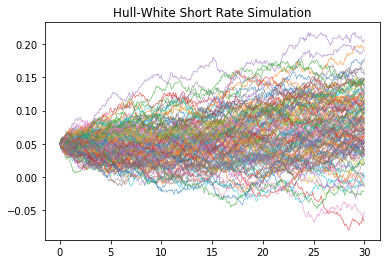

In [18]:
time, paths = generate_paths(num_paths, timestep)

for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
    
plt.title("Hull-White Short Rate Simulation")
plt.show()

In [34]:
#Geometric Brownian Motion
## input variable
maturity=float(input("Please enter maturity of the bond (years): "))
strike_price=float(input("Please enter the strike price ($): "))
current_price=float(input("Please enter the current price ($): "))
rate=float(input("Please enter riskless interest rate (%): "))*0.01
time=float(input("Please enter each period length (months): "))/12

dt=round(maturity/time)

Please enter maturity of the bond (years): 3
Please enter the strike price ($): 60
Please enter the current price ($): 55
Please enter riskless interest rate (%): 3
Please enter each period length (months): 3


In [46]:
def GBM(S0, short_rate, sigma, N, dt):
    
    seed=5
    
    def Brownian(seed, N):
        
        np.random.seed(seed)
        b=np.random.normal(0., 1., int(N))*np.sqrt(dt)
        W=np.cumsum(b)
        return W, b
    
    b=Brownian(seed, N)[1]
    
    W=Brownian(seed, N)[0]
    W=np.insert(W, 0, 0)
    
    t=np.linspace(0., 1., N+1)
    S=[]
    S.append(S0)
    for i in range(1, int(N+1)):
        drift=(short_rate - 0.5*sigma**2)*t[1]
        diffusion= sigma*W[i-1]
        S_temp= S0*np.exp(drift+diffusion)
        S.append(S_temp)
    return S, t

In [48]:
for i in range(num_paths):
    gbm=GBM(current_price, paths[i, :], sigma, num_paths, dt)[0]
    gbm_time=GBM(current_price, paths[i, :], sigma, num_paths, dt)[1]
gbm

[55.0, array([55.02146708, 55.02229396, 55.02183894, 55.02384619, 55.02396355,
        55.02474525, 55.02591094, 55.02576331, 55.02534226, 55.02541314,
        55.02459136, 55.02358425, 55.02400206, 55.02386794, 55.02226322,
        55.02068905, 55.02034556, 55.02003179, 55.02033879, 55.02124948,
        55.02071639, 55.02192153, 55.02364055, 55.02317141, 55.02188112,
        55.02200246, 55.02166914, 55.02294392, 55.02263209, 55.02094986,
        55.01933755, 55.01890786, 55.01996256, 55.02117703, 55.0182117 ,
        55.01795264, 55.01823454, 55.01873873, 55.02044939, 55.0197178 ,
        55.0197665 , 55.01811788, 55.01807852, 55.01780216, 55.01609287,
        55.01850425, 55.01676491, 55.01676374, 55.01605164, 55.01329165,
        55.0138094 , 55.01210082, 55.01199165, 55.01022834, 55.01061838,
        55.00973839, 55.00720491, 55.00487855, 55.00329555, 55.00302896,
        55.00400178, 55.00315441, 55.00505518, 55.00437642, 55.00134473,
        55.00155103, 55.00225217, 55.0040823 

In [75]:
#Calculate payoff

for i in range(len(gbm)):
    price=gbm[i]
    discount_price=np.exp(-1*rate*i)*price
    call_price=strike_price-discount_price
    put_price=discount_price-strike_price
    

In [76]:
print("The mean call price is: ", max(0, np.mean(call_price)))
print("The mean put price is: ", max(0, np.mean(put_price)))

The mean call price is:  58.50191658817918
The mean put price is:  0
